In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Observation
1.This dataset contains 213 rows and 11 columns.

2.As there are numeric column names ,let's first replace them with alphabetical ones acc to our question 

In [3]:
df.rename(columns={'1':'Id','1.52101':'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Type of Glass'},inplace=True)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Now we have column names and data seems good

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of Glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [5]:
df['Type of Glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

# Observation
1.There are no nulls in our dataset.

2.Our dataset have 11 columns out of which id have dtype int and have discrete data where as all columns have float data.

3.Type of Glass column have 6 categories and dtype is int.We have to predict this only so this our Target variable and this is multiclassification problem.

4.In my opinion id have no impact on our target variable so we can drop it off.

In [6]:
#let's drop id column
df.drop('Id',axis=1,inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [7]:
#let's remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.shape  #This is our dataset after removing duplicates

(212, 10)

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.518335,13.402972,2.670660,1.451132,72.659198,0.500943,8.955047,0.176698,0.057547,2.797170
std,0.003035,0.818433,1.441703,0.496514,0.773477,0.654030,1.429187,0.499277,0.097740,2.106499
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516517,12.897500,2.037500,1.190000,72.310000,0.130000,8.237500,0.000000,0.000000,1.000000
50%,1.517670,13.295000,3.480000,1.365000,72.800000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519120,13.815000,3.600000,1.630000,73.092500,0.610000,9.157500,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Observation
1.Data seems to be left skewed in Mg column because mean<median.

2.Data seems to be right skewed in Ca and Ba column because mean >median.

3.it seems like K,Ca,Ba have some outliers.

We can also check min, max,25%,75% from this method

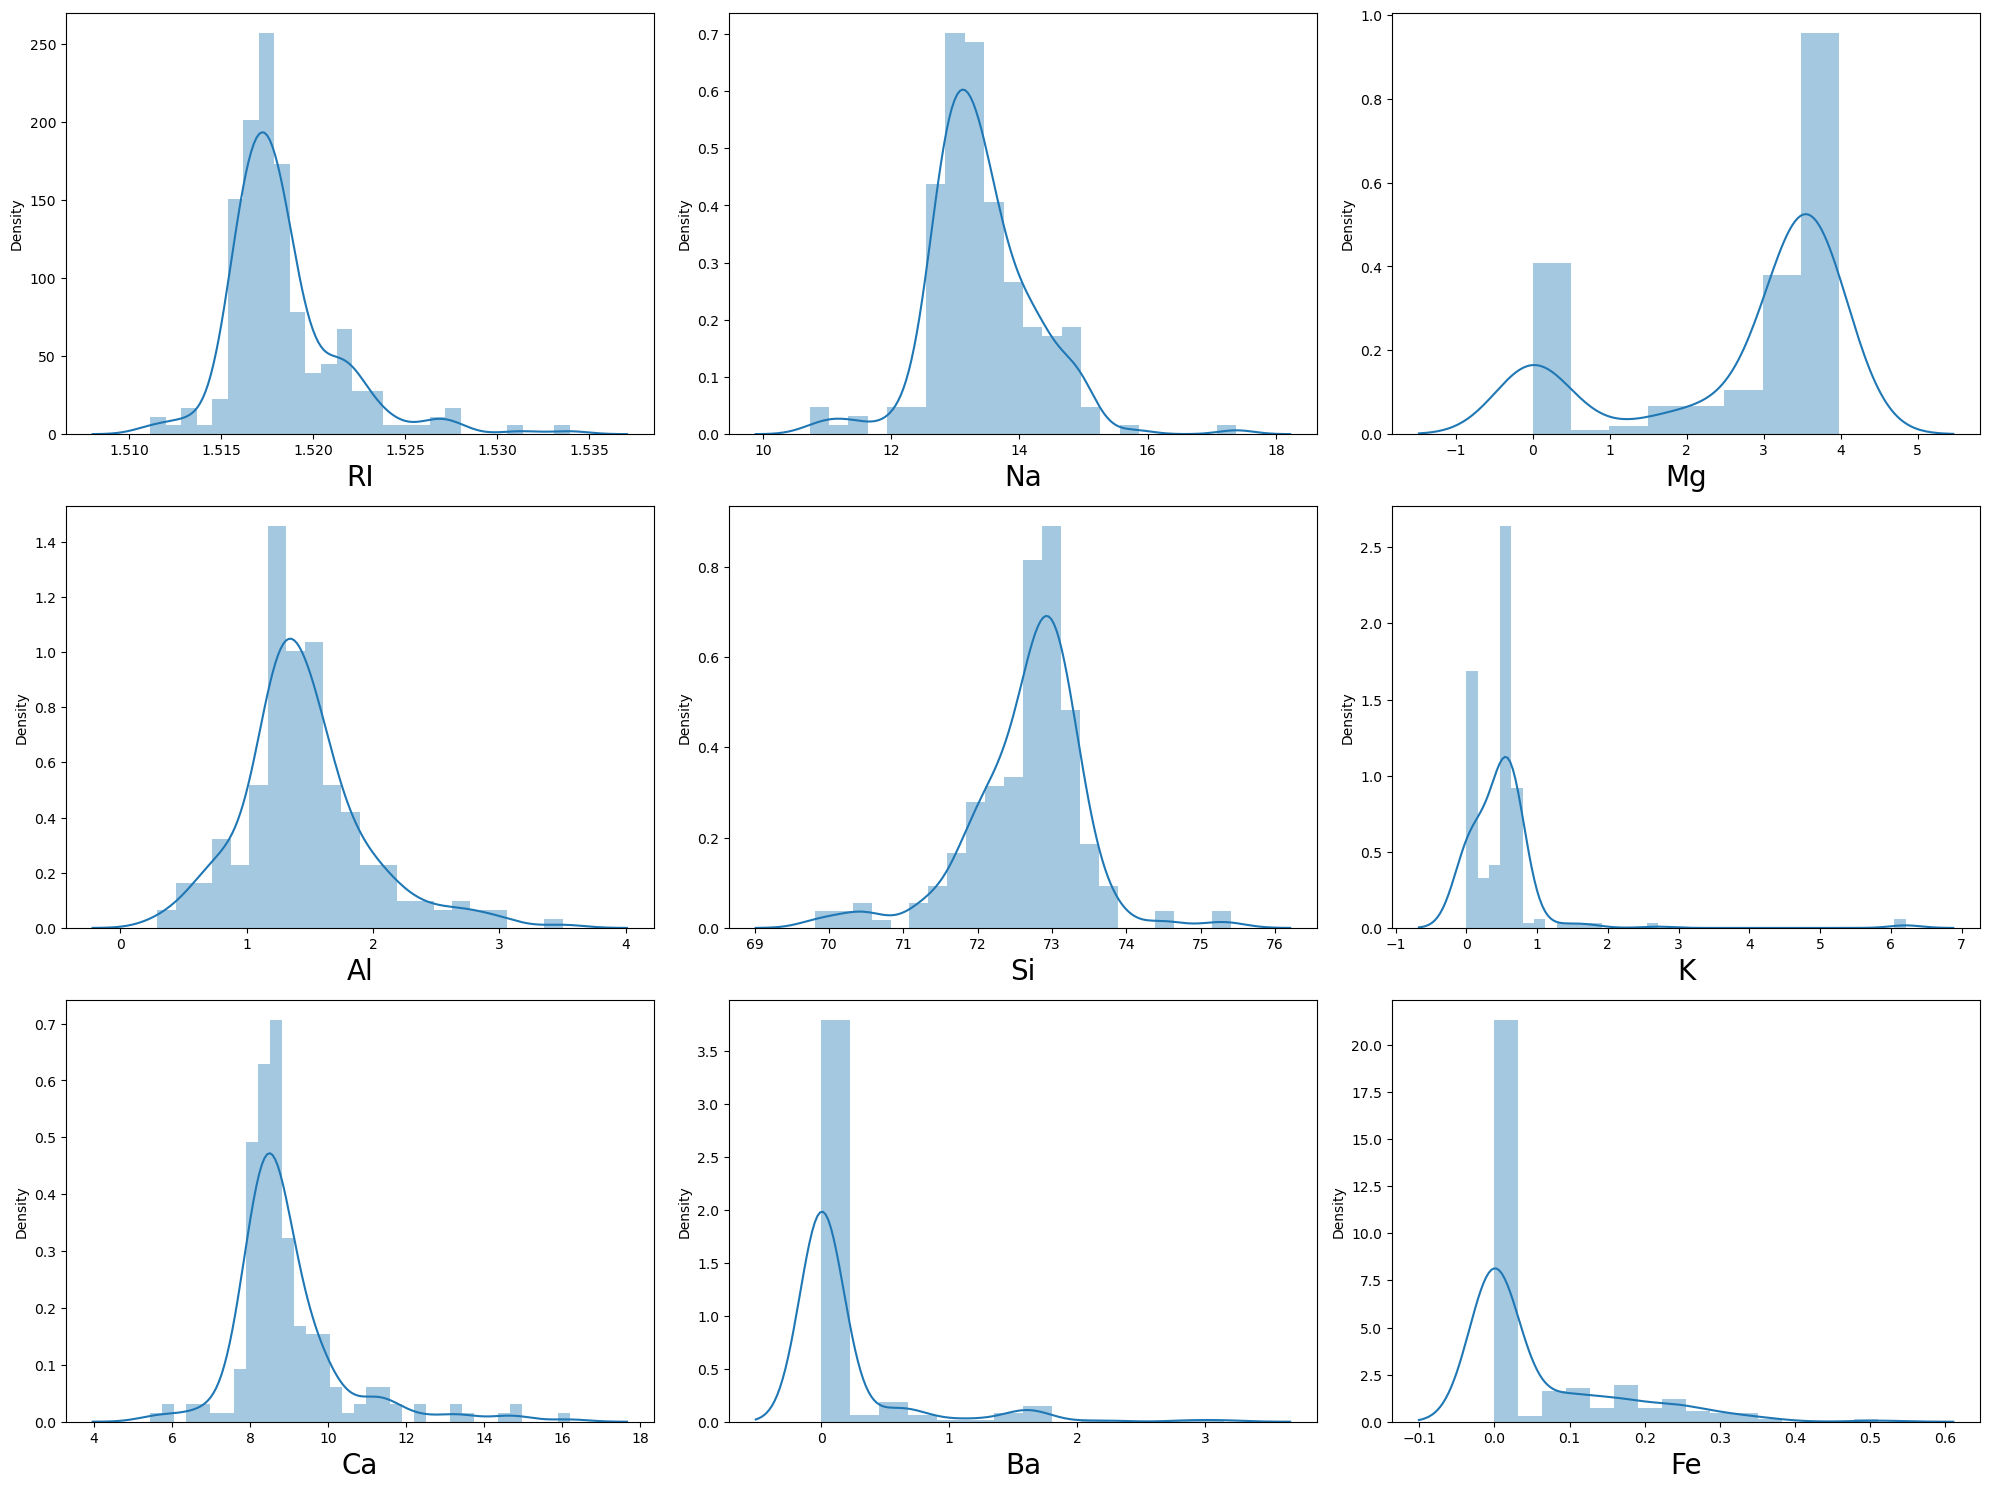

In [10]:
#Let's check data distribution for each column

plt.figure(figsize=(20,15))
plotnumber = 1
for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
Data dist seems to be good but have outliers in it.

Lets visualize using more plots

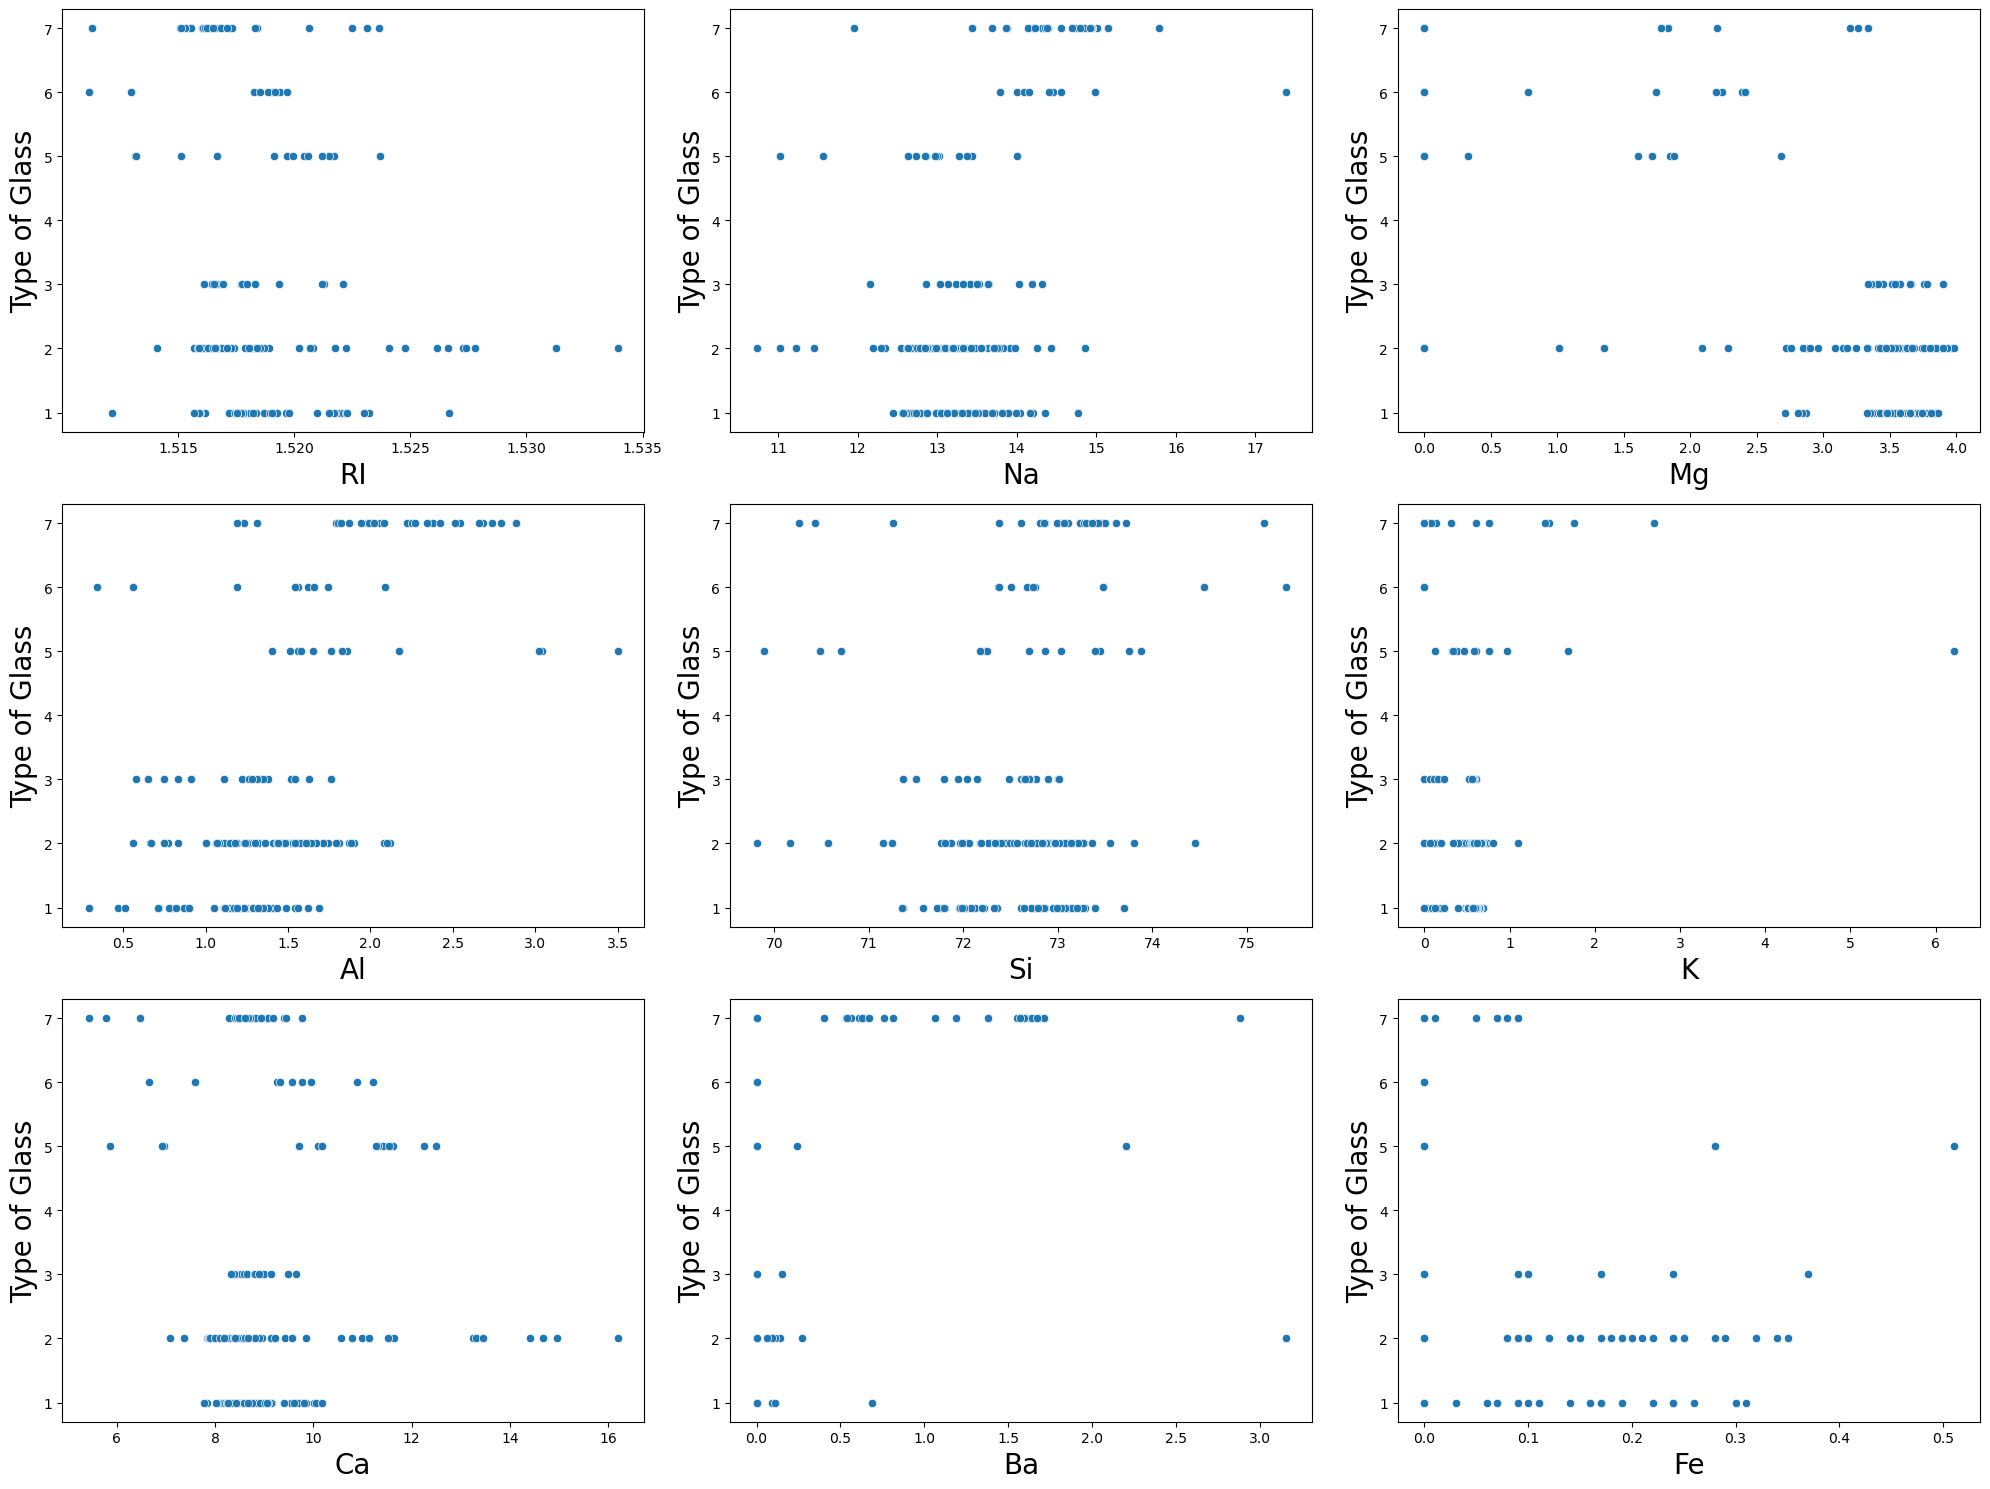

In [11]:
#lets see relation of features with label
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(df[col],df['Type of Glass'])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Type of Glass',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# It looks like each n every feature is related with our target column.
Lets check for outliers

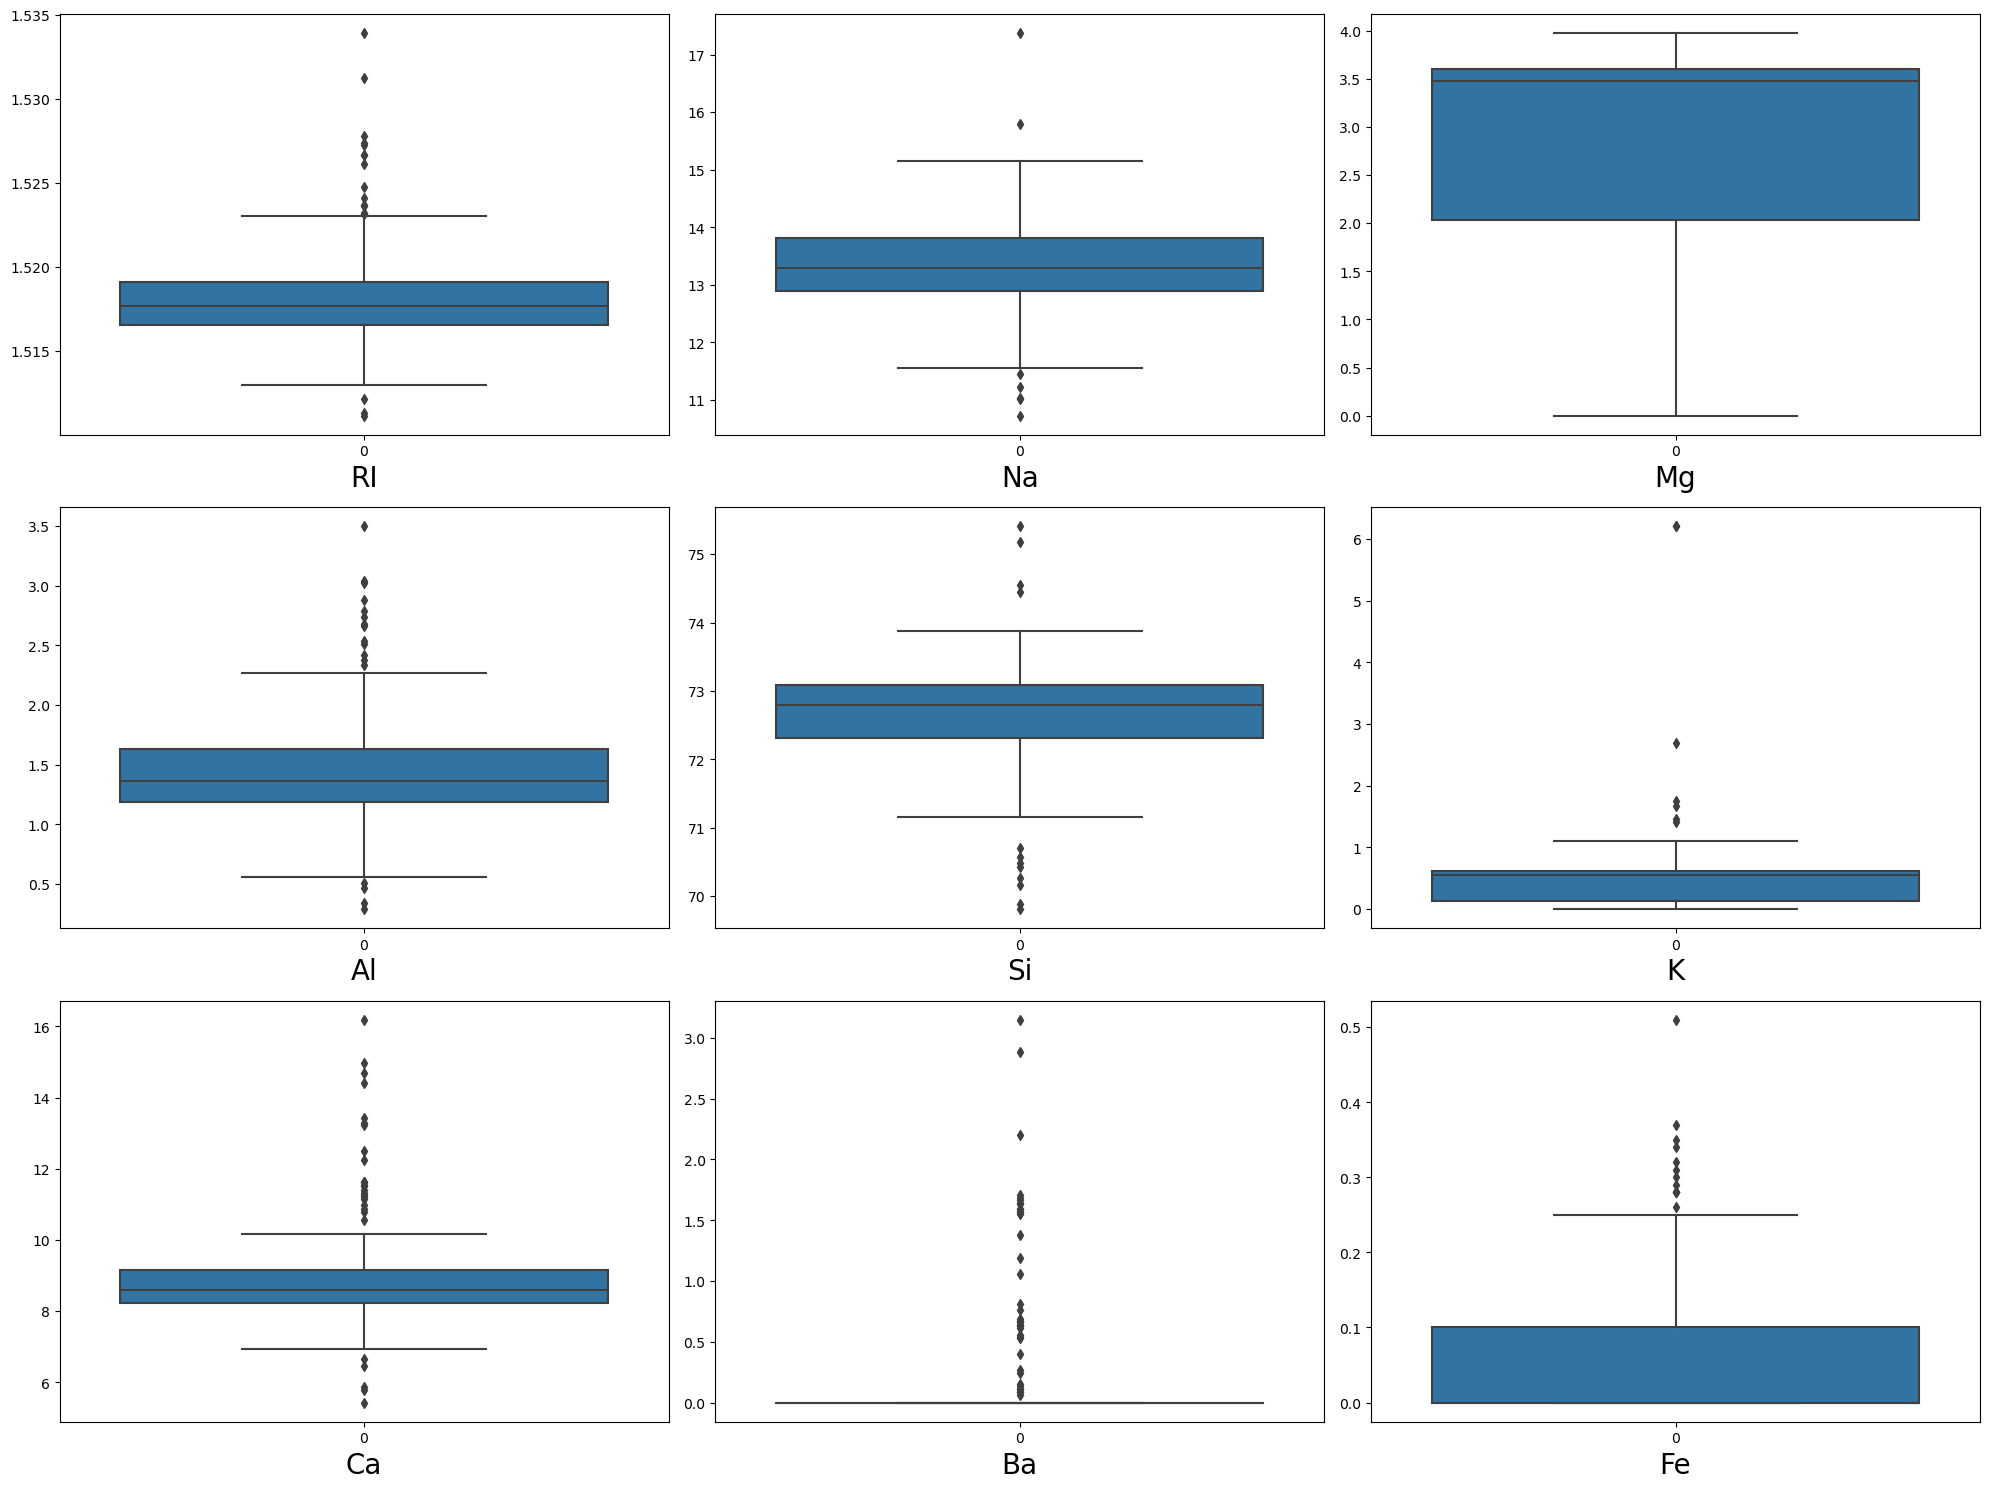

In [12]:
#lets see outliers for each column using box plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data=df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
All columns except Mg column have outliers in it.
Lets check skewness and reduce it using diff methods, if there is any.

In [13]:
df.skew()

RI               1.662549
Na               0.468899
Mg              -1.147886
Al               0.931156
Si              -0.758957
K                6.543138
Ca               2.044273
Ba               3.397046
Fe               1.739994
Type of Glass    1.102793
dtype: float64

# Observation
Skewness is present in all the coulmns.Let's reduce it 

In [14]:
#lets use cube root method
df['RI']=np.cbrt(df['RI'])
df['Na']=np.cbrt(df['Na'])
df['Mg']=np.cbrt(df['Mg'])
df['Al']=np.cbrt(df['Al'])
df['Si']=np.cbrt(df['Si'])
df['K']=np.cbrt(df['K'])
df['Ca']=np.cbrt(df['Ca'])
df['Ba']=np.cbrt(df['Ba'])
df['Fe']=np.cbrt(df['Fe'])                

In [15]:
df.skew()

RI               1.654115
Na               0.187383
Mg              -1.426903
Al              -0.174394
Si              -0.806021
K               -0.609834
Ca               1.408515
Ba               2.057406
Fe               0.880041
Type of Glass    1.102793
dtype: float64

# Observation
Skewness have reduced to some level in fact Na and Al column have skewness in range.
But let's check other method also

In [16]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df1

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [17]:
df1.rename(columns={'1':'Id','1.52101':'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Type of Glass'},inplace=True)
df1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [18]:
df1.drop('Id',axis=1,inplace=True)
df1.drop_duplicates(inplace=True)
df1.shape

(212, 10)

In [19]:
df1.skew()

RI               1.662549
Na               0.468899
Mg              -1.147886
Al               0.931156
Si              -0.758957
K                6.543138
Ca               2.044273
Ba               3.397046
Fe               1.739994
Type of Glass    1.102793
dtype: float64

In [20]:
#Let's use square root method
df1['RI']=np.sqrt(df1['RI'])
df1['Na']=np.sqrt(df1['Na'])
df1['Mg']=np.sqrt(df1['Mg'])
df1['Al']=np.sqrt(df1['Al'])
df1['Si']=np.sqrt(df1['Si'])
df1['K']=np.sqrt(df1['K'])
df1['Ca']=np.sqrt(df1['Ca'])
df1['Ba']=np.sqrt(df1['Ba'])
df1['Fe']=np.sqrt(df1['Fe'])

In [21]:
df1.skew()

RI               1.656222
Na               0.257247
Mg              -1.353283
Al               0.122562
Si              -0.794287
K                0.858611
Ca               1.572244
Ba               2.360903
Fe               1.038801
Type of Glass    1.102793
dtype: float64

# Skewness have reduced but not much in comparison to cube root method
Let's try log transformation

In [22]:
df2=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df2

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [23]:
df2.rename(columns={'1':'Id','1.52101':'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Type of Glass'},inplace=True)
df2

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [24]:
df2.drop('Id',axis=1,inplace=True)
df2.drop_duplicates(inplace=True)
df2.shape

(212, 10)

In [25]:
#Let's use log transformation method
#Lets impute 0 with their mean
df2['Mg']=df2['Mg'].replace(0,df2['Mg'].mean())
df2['K']=df2['K'].replace(0,df2['K'].mean())
df2['Ba']=df2['Ba'].replace(0,df2['Ba'].mean())
df2['Fe']=df2['Fe'].replace(0,df2['Fe'].mean())


In [26]:
#Lets transform using log method
df2['RI']=np.log(df2['RI'])
df2['Na']=np.log(df2['Na'])
df2['Mg']=np.log(df2['Mg'])
df2['Al']=np.log(df2['Al'])
df2['Si']=np.log(df2['Si'])
df2['K']=np.log(df2['K'])
df2['Ca']=np.log(df2['Ca'])
df2['Ba']=np.log(df2['Ba'])
df2['Fe']=np.log(df2['Fe'])

In [27]:
df2.skew()

RI               1.649904
Na               0.048251
Mg              -3.955560
Al              -0.825766
Si              -0.829427
K               -1.143369
Ca               1.069313
Ba               2.351543
Fe               1.125651
Type of Glass    1.102793
dtype: float64

# Observation
Skewness is reduced but not much as in comparison to cube root method
Let's try power transformation tech

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
df3=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df3

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [30]:
df3.rename(columns={'1':'Id','1.52101':'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Type of Glass'},inplace=True)
df3

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [31]:
df3.drop('Id',axis=1,inplace=True)
df3.drop_duplicates(inplace=True)
df3.shape

(212, 10)

In [32]:
features=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

In [33]:
scaler=PowerTransformer()
df3[features]=scaler.fit_transform(df3[features].values)
df3[features]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.0,0.622137,0.685637,-0.089851,0.032086,0.262872,-0.878270,-0.457315,-0.684365
1,0.0,0.190226,0.624963,0.282469,0.388875,0.006118,-0.931827,-0.457315,-0.684365
2,0.0,-0.204873,0.796938,-0.242612,-0.127600,0.490578,-0.483956,-0.457315,-0.684365
3,0.0,-0.129964,0.710139,-0.354704,0.515904,0.442230,-0.630874,-0.457315,-0.684365
4,0.0,-0.740341,0.697871,0.439295,0.360896,0.650636,-0.630874,-0.457315,1.712575
...,...,...,...,...,...,...,...,...,...
208,0.0,0.914602,-1.735088,2.412174,-0.127600,-1.200279,0.336638,2.360119,-0.684365
209,0.0,1.790306,-1.735088,1.105677,0.487516,-1.631083,-0.314947,2.366116,-0.684365
210,0.0,1.167108,-1.735088,1.155929,1.012711,-1.631083,-0.278422,2.366270,-0.684365
211,0.0,1.189843,-1.735088,1.020758,1.302355,-1.631083,-0.242262,2.366045,-0.684365


In [34]:
df3.skew()

RI               0.000000
Na              -0.010956
Mg              -0.907541
Al              -0.002188
Si               0.137478
K               -0.078107
Ca              -0.209112
Ba               1.810855
Fe               0.846420
Type of Glass    1.102793
dtype: float64

In [35]:
df3['RI'].nunique()

1

# Observation 
Skewness is reducing more in power transformer but at the same time it is making RI column 0 and we can't afford that.

So i m proceeding ahead with cube root transformation method.

Now as our skewness is reduced ,Let's remove outliers using zscore method

In [36]:
from scipy.stats import zscore

In [37]:
col=df[['RI','Na','Al','Si','K','Ca','Ba','Fe']]
z_score=np.abs(zscore(col))
z_score

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,0.239175,0.612375,0.073370,0.095013,0.338796,0.836290,0.441940,0.684069
1,0.712339,0.176046,0.288553,0.430387,0.181055,0.877620,0.441940,0.684069
2,0.222637,0.218348,0.222749,0.060045,0.477864,0.519800,0.441940,0.684069
3,0.302026,0.143918,0.332790,0.546293,0.448300,0.640317,0.441940,0.684069
4,0.785160,0.745778,0.440368,0.404618,0.576196,0.640317,0.441940,1.763705
...,...,...,...,...,...,...,...,...
208,0.695790,0.910964,2.357736,0.060045,0.721926,0.218754,2.304935,0.684069
209,0.490610,1.820525,1.084060,0.520545,2.020049,0.377099,2.702446,0.684069
210,0.765725,1.170825,1.132626,0.983302,2.020049,0.345665,2.735067,0.684069
211,0.603121,1.194317,1.002021,1.226926,2.020049,0.314330,2.689207,0.684069


In [38]:
np.where(z_score>3)

(array([ 20, 104, 104, 104, 104, 105, 105, 105, 108, 109, 109, 110, 110,
        161, 161, 161, 164, 169, 170, 182, 182, 182, 183, 186, 199, 205],
       dtype=int64),
 array([2, 0, 1, 3, 6, 0, 3, 5, 5, 1, 5, 0, 5, 2, 3, 6, 1, 4, 4, 1, 2, 3,
        5, 3, 3, 6], dtype=int64))

In [39]:
data=df[(z_score<3).all(axis=1)]
data.shape

(197, 10)

In [40]:
#let's check for dataloss
print('Data loss is :',((df.shape[0]-data.shape[0])/df.shape[0])*100)

Data loss is : 7.0754716981132075


# Observation
1.Outliers are removed.

2.After removing outliers ,our data loss is 7% which is in our acceptable range.

Now  let's check for distribution

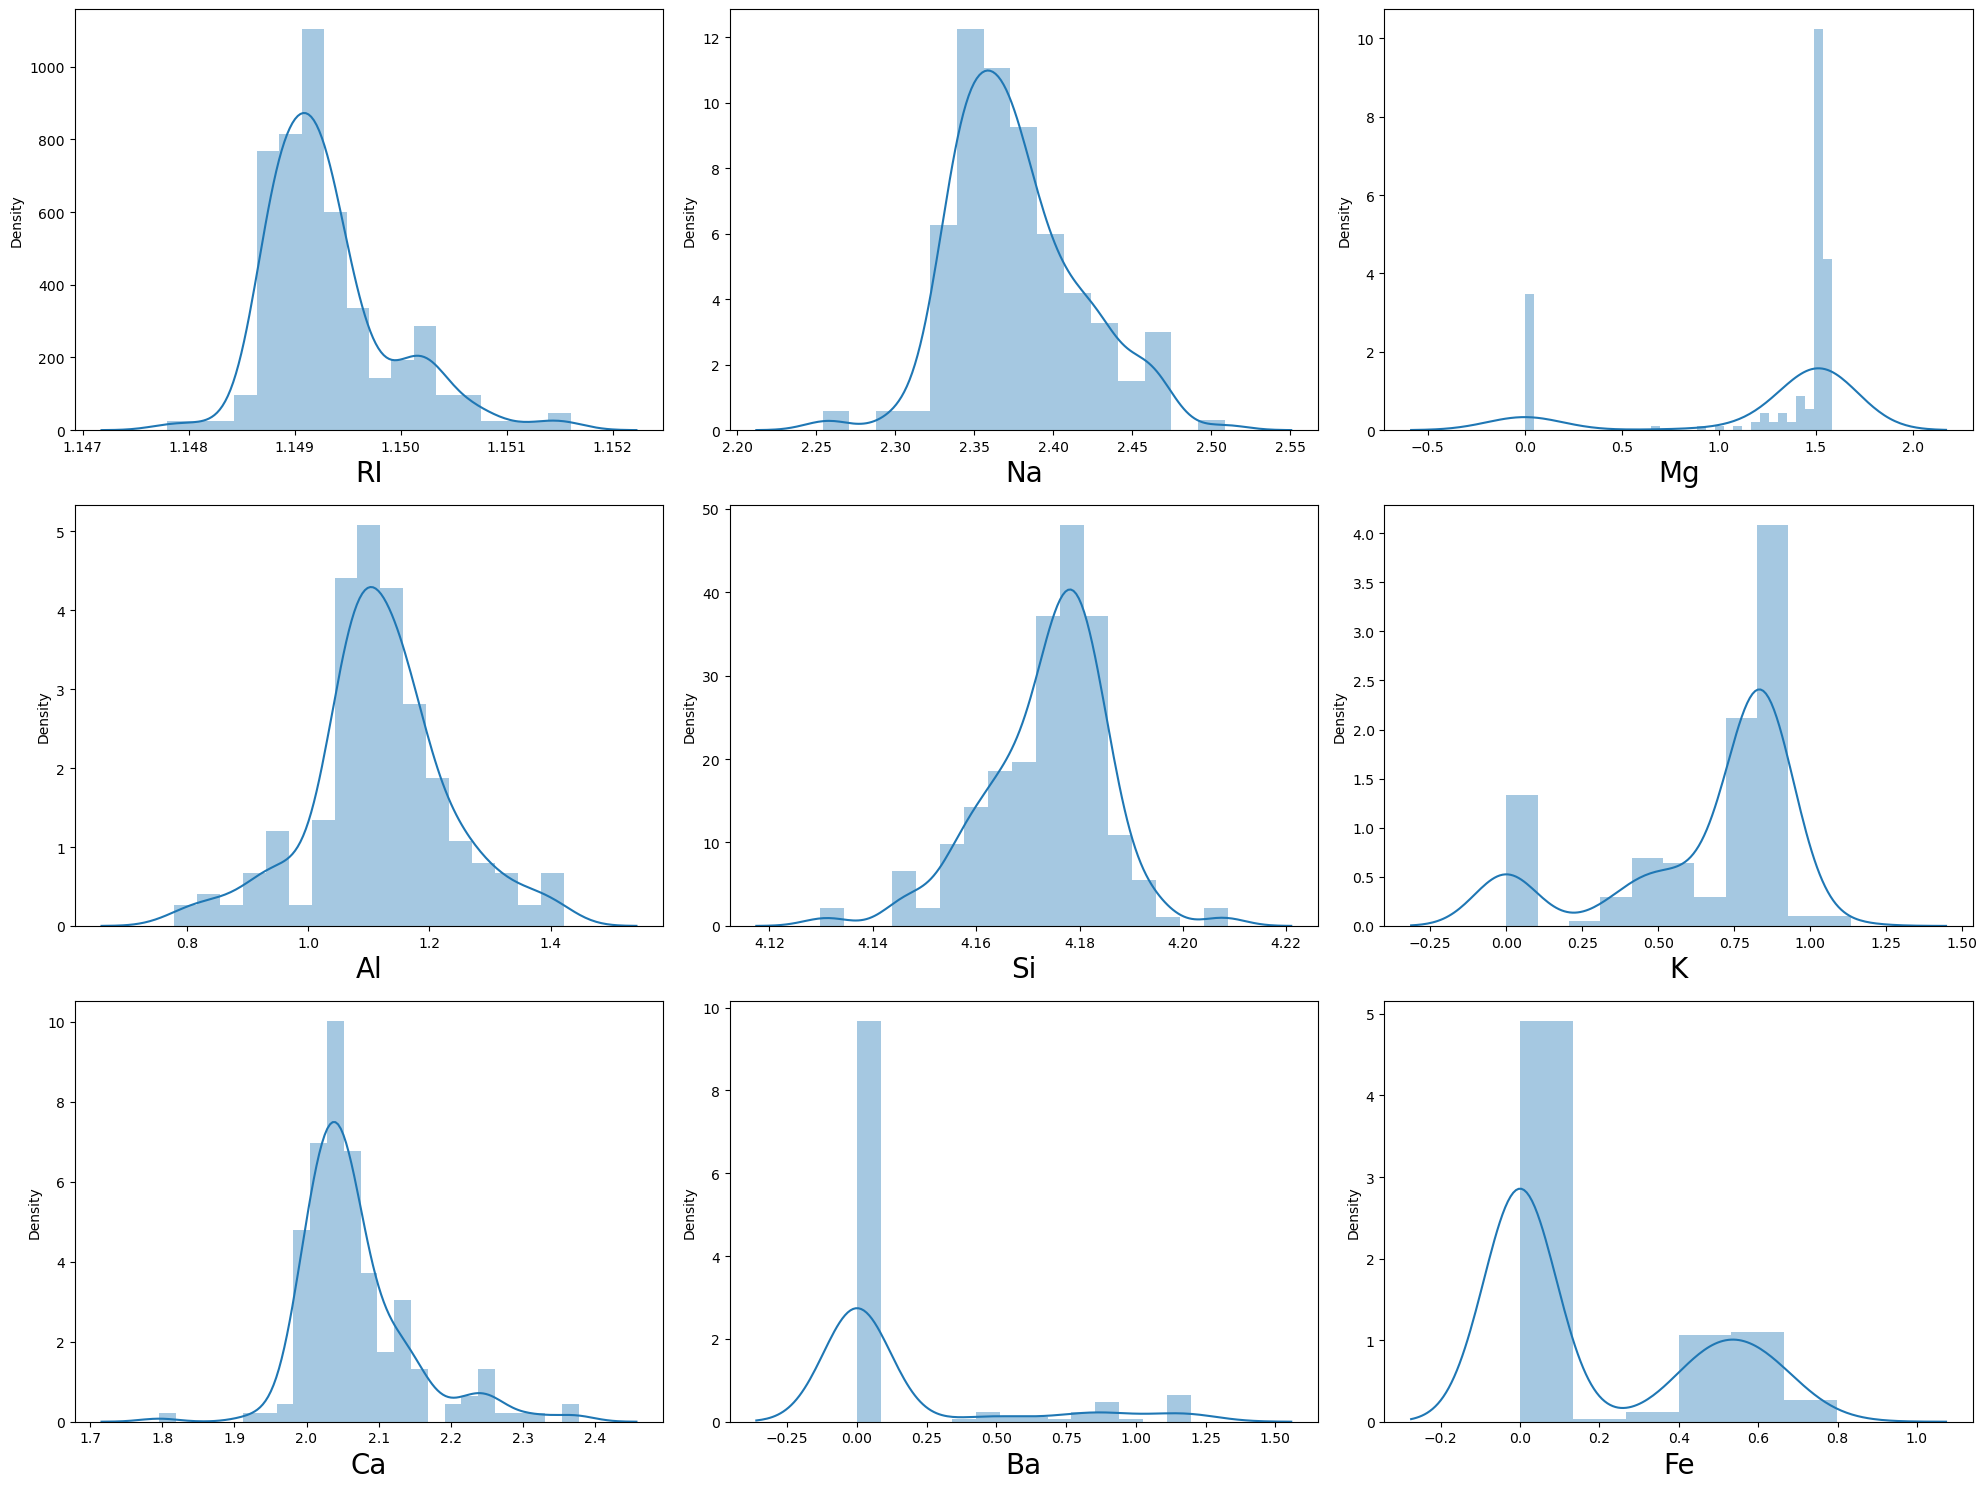

In [41]:
#Let's check data distribution for each column after reducing skewness and removing outliers

plt.figure(figsize=(20,15))
plotnumber = 1
for col in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

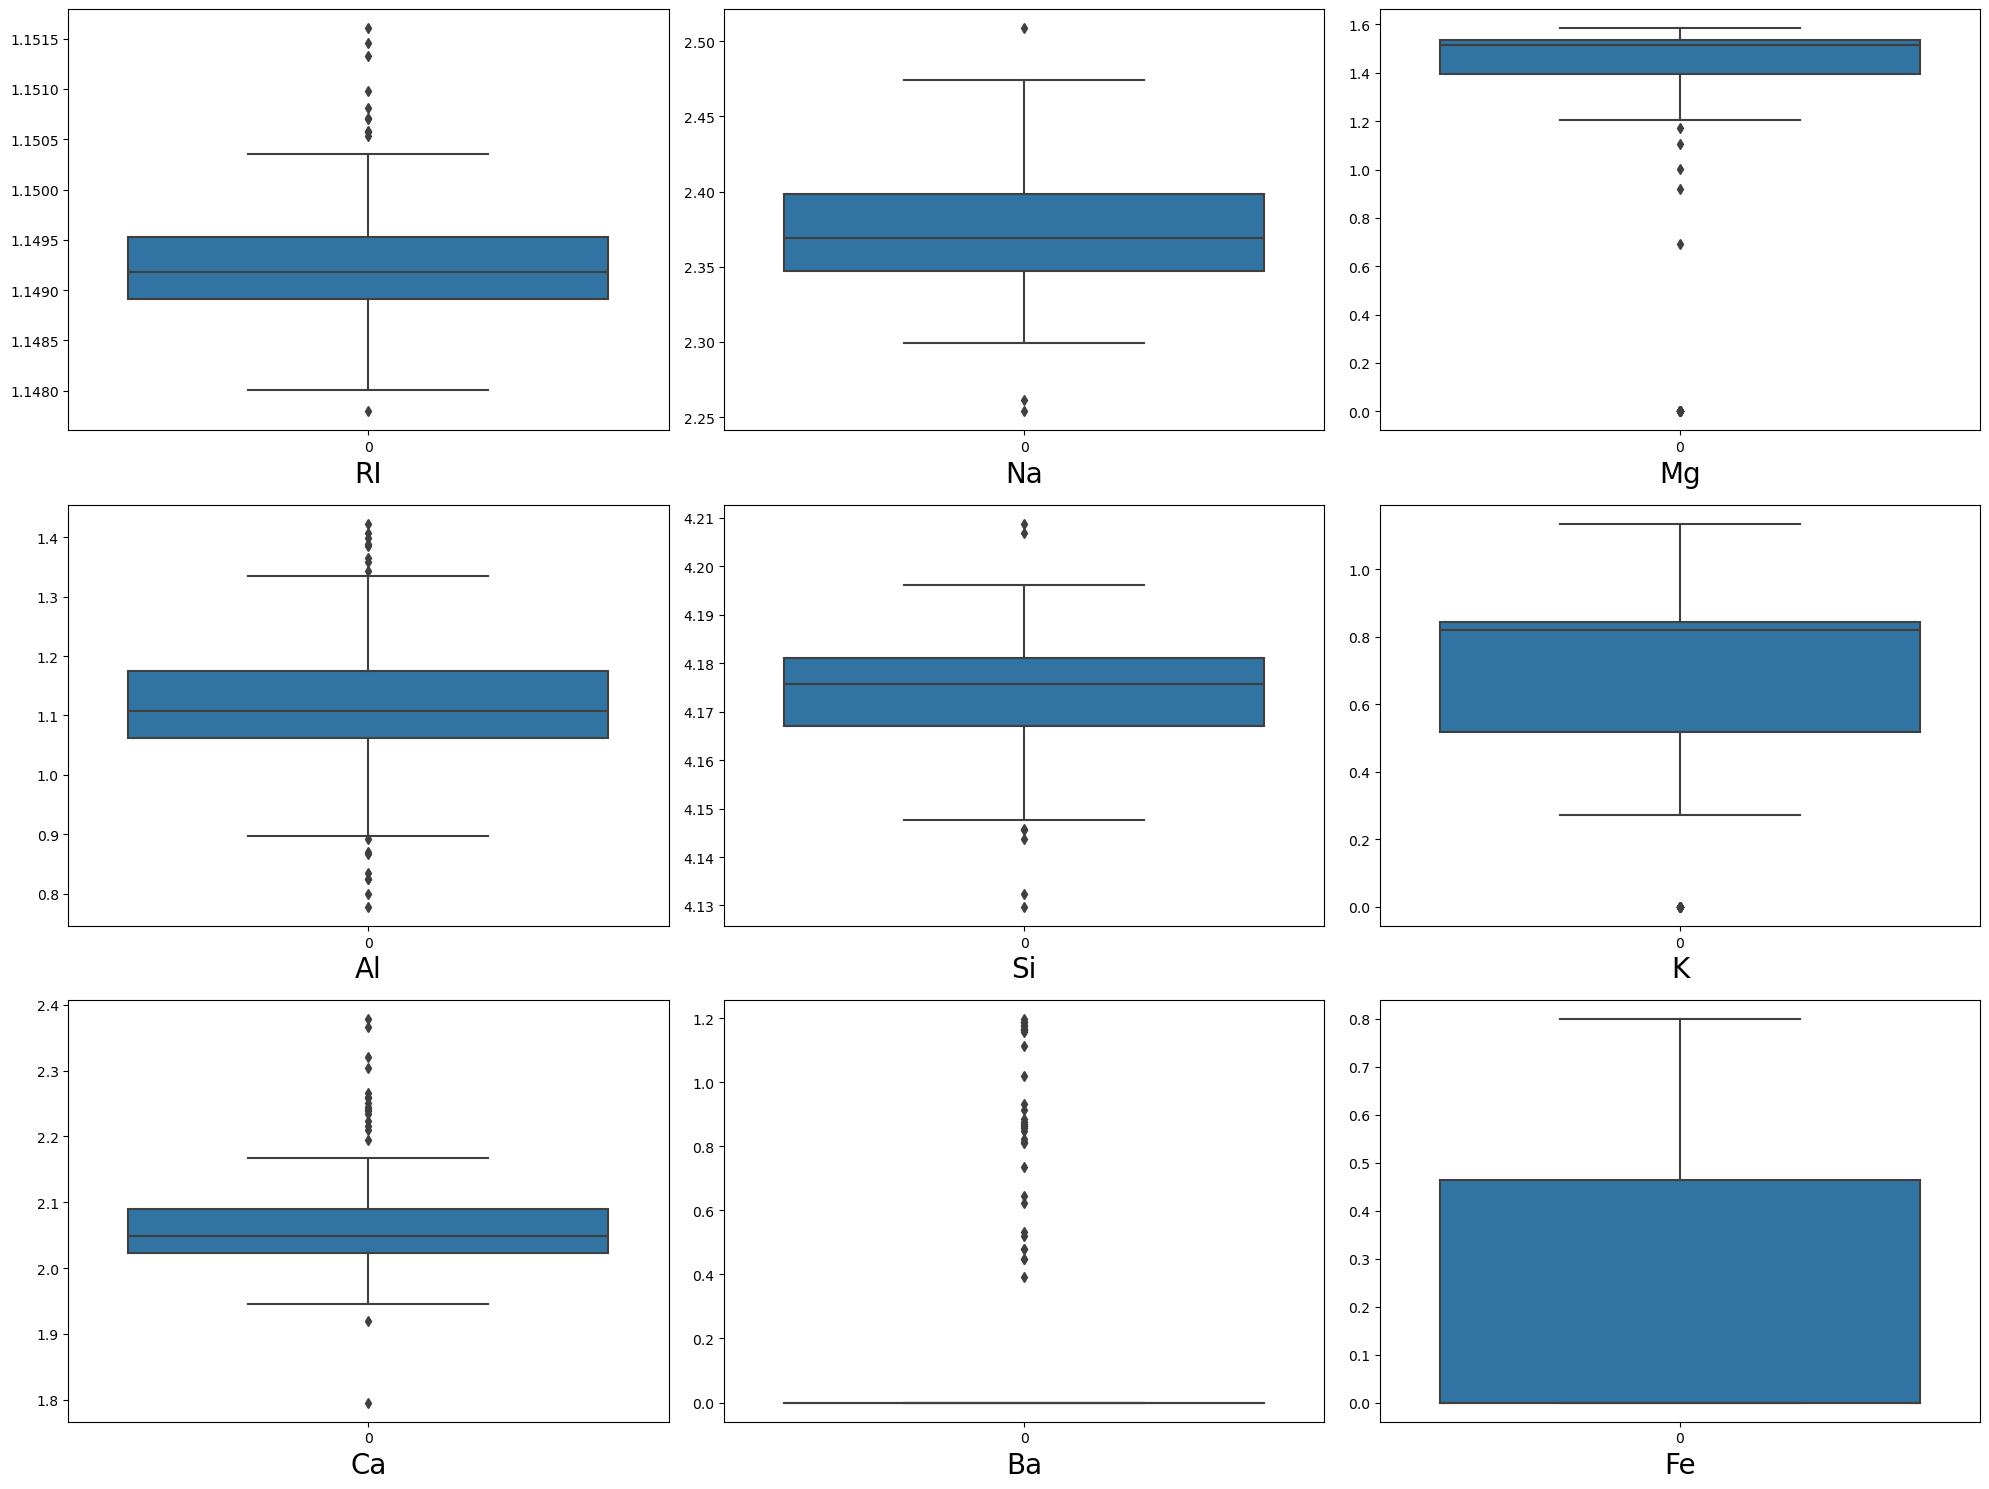

In [42]:
#lets see outliers for each column using box plot again
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data=data[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
Though outliers have not been removed completely, we reduced them to some level.

Now if we remove them completely it will result in huge data loss which we can't afford

Also data is in range so no need to remove all outliers.

Now let's check corelation

In [43]:
corr=data.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,0.062260,-0.002083,-0.498188,-0.662731,-0.119714,0.697291,-0.145264,0.096642,-0.109536
Na,0.062260,1.000000,-0.496978,0.201967,-0.230354,-0.730590,0.000712,0.588699,-0.205022,0.603230
Mg,-0.002083,-0.496978,1.000000,-0.517868,-0.298215,0.620104,-0.436104,-0.647654,0.096497,-0.767819
Al,-0.498188,0.201967,-0.517868,1.000000,0.312336,-0.132336,-0.222498,0.539658,-0.088511,0.595573
Si,-0.662731,-0.230354,-0.298215,0.312336,1.000000,-0.078977,-0.228020,0.128826,-0.058121,0.193573
K,-0.119714,-0.730590,0.620104,-0.132336,-0.078977,1.000000,-0.287270,-0.543066,0.164679,-0.664394
Ca,0.697291,0.000712,-0.436104,-0.222498,-0.228020,-0.287270,1.000000,-0.100542,0.088369,0.144543
Ba,-0.145264,0.588699,-0.647654,0.539658,0.128826,-0.543066,-0.100542,1.000000,-0.057447,0.723827
Fe,0.096642,-0.205022,0.096497,-0.088511,-0.058121,0.164679,0.088369,-0.057447,1.000000,-0.181892
Type of Glass,-0.109536,0.603230,-0.767819,0.595573,0.193573,-0.664394,0.144543,0.723827,-0.181892,1.000000


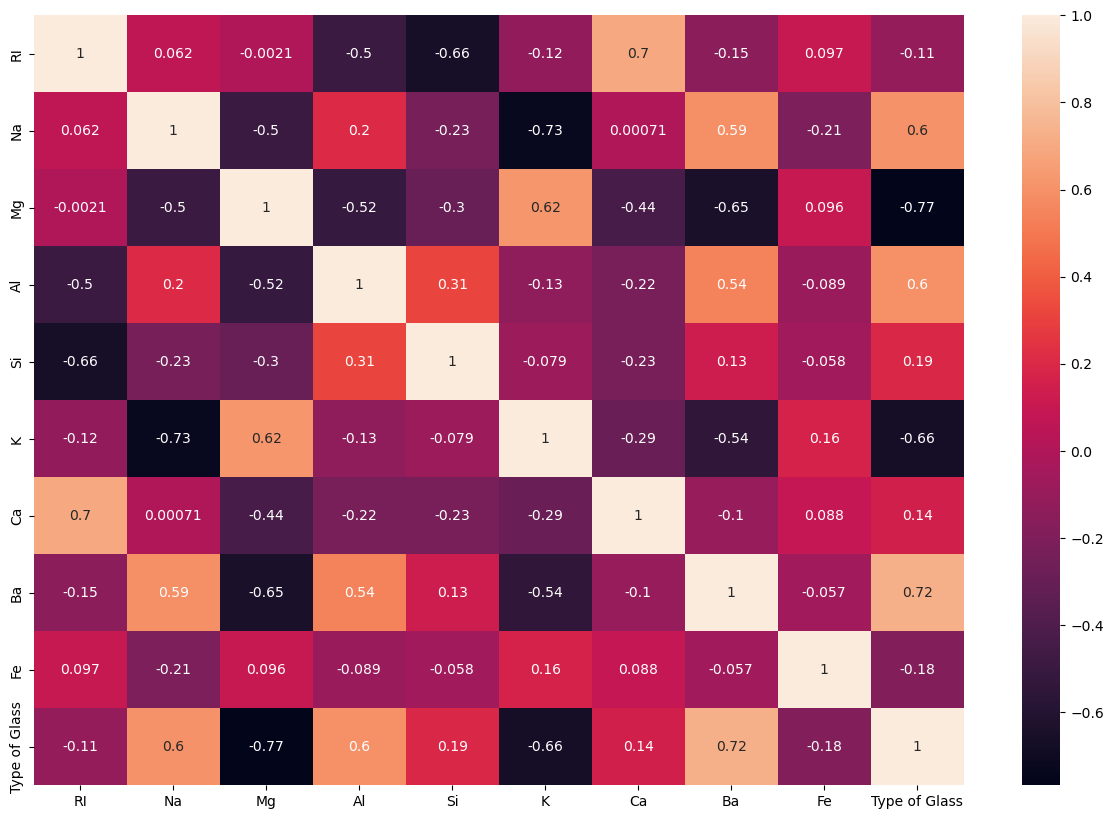

In [44]:
#Let's plot heatmap to visualize 
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

# Observation
1.Mg column is strongly in -ve corelation with our target.

2.Ba column is strongly in +ve corelation with our target.

3.RI,Fe,K are negatively affecting our target where as Na,Al,Si,Ca are positively affecting our target.

4.K and Na,Ba and Mg , Si and RI these are in strong -ve corelation.

5.Ca and RI are strongly in positive relation.

6.Ba and Na,K and Mg,Si and Al are in poitive relation whereas Al and Mg are in -ve relation.

We can see other relations as well.

Now let's check for multicollinearity issue

In [45]:
data.drop('Type of Glass',axis=1).corrwith(data['Type of Glass'])

RI   -0.109536
Na    0.603230
Mg   -0.767819
Al    0.595573
Si    0.193573
K    -0.664394
Ca    0.144543
Ba    0.723827
Fe   -0.181892
dtype: float64

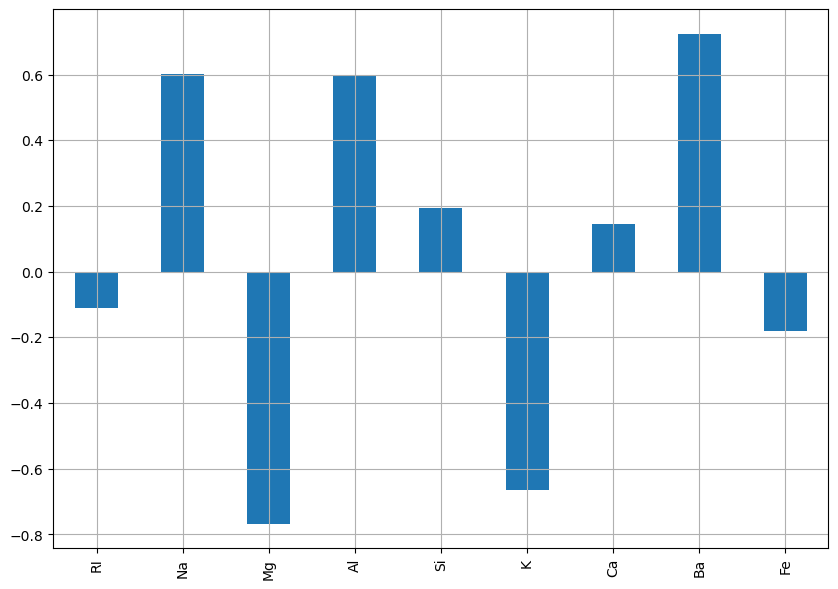

In [46]:
data.drop('Type of Glass',axis=1).corrwith(data['Type of Glass']).plot(kind='bar',grid=True,figsize=(10,7))
plt.show()

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
 #lets first standarize our data
from sklearn.preprocessing import StandardScaler
#first lets separate features and labels
X=data.drop(columns=['Type of Glass'])
y=data['Type of Glass']
#now lets standarize our data
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.233647,0.688125,0.512386,-0.086770,0.047482,0.415094,-1.064236,-0.433971,-0.706757
1,-0.842119,0.165873,0.499643,0.324334,0.471476,0.240038,-1.119623,-0.433971,-0.706757
2,-0.212379,-0.306184,0.535028,-0.256448,-0.148548,0.569428,-0.640104,-0.433971,-0.706757
3,-0.314471,-0.217097,0.517450,-0.381442,0.618008,0.536619,-0.801610,-0.433971,-0.706757
4,-0.935764,-0.937475,0.514920,0.496779,0.438897,0.678554,-0.801610,-0.433971,1.725311
...,...,...,...,...,...,...,...,...,...
192,-0.820838,1.045512,-2.227214,2.674692,-0.148548,-0.762065,0.349639,2.518076,-0.706757
193,-0.556983,2.134183,-2.227214,1.227940,0.585456,-2.202684,-0.448869,2.945279,-0.706757
194,1.058619,1.356544,-2.227214,1.283105,1.170492,-2.202684,-0.406744,2.980336,-0.706757
195,-0.701669,1.384662,-2.227214,1.134753,1.478490,-2.202684,-0.364752,2.931050,-0.706757


In [49]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=X.columns
#let's check for value
vif

,vif,features
0,5.613651,RI
1,6.914302,Na
2,11.971535,Mg
3,3.185990,Al
4,5.758875,Si
5,4.309167,K
6,8.616313,Ca
7,3.794574,Ba
8,1.093135,Fe


# Observation
Now here vif value is >10 for Mg column,it means multicollinearity problem exists.

so lets drop it off

In [50]:
X.drop('Mg',axis=1,inplace=True)
X.shape

(197, 8)

In [51]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=X.columns
#let's check for value
vif

,vif,features
0,5.612356,RI
1,4.126112,Na
2,2.201776,Al
3,3.290297,Si
4,3.933825,K
5,3.080690,Ca
6,2.604257,Ba
7,1.089289,Fe


# Observation
Now there is no issue of multicollinearity

Here i m not applying feature selection tech because dataset is reduced already and all features are important 

From here we can proceed ahead for model building

In [52]:
from sklearn.model_selection import train_test_split
#lets split data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=155)

In [53]:
#import lib
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [54]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [55]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:78.98%

===Test Result====
Accuracy Score:62.50%


Test Classification Report
               precision    recall  f1-score   support

           1       0.52      0.79      0.63        14
           2       0.67      0.62      0.64        13
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.62        40
   macro avg       0.48      0.57      0.51        40
weighted avg       0.53      0.62      0.57        40



In [57]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:65.00%


Test Classification Report
               precision    recall  f1-score   support

           1       0.60      0.64      0.62        14
           2       0.57      0.62      0.59        13
           3       0.67      0.40      0.50         5
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           0.65        40
   macro avg       0.72      0.69      0.70        40
weighted avg       0.65      0.65      0.65        40



In [59]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [60]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:98.09%

===Test Result====
Accuracy Score:60.00%


Test Classification Report
               precision    recall  f1-score   support

           1       0.55      0.79      0.65        14
           2       0.50      0.46      0.48        13
           3       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.60        40
   macro avg       0.62      0.57      0.54        40
weighted avg       0.61      0.60      0.56        40



In [61]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:67.50%


Test Classification Report
               precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.60      0.69      0.64        13
           3       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.68        40
   macro avg       0.65      0.61      0.58        40
weighted avg       0.68      0.68      0.64        40



In [63]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [64]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:45.22%

===Test Result====
Accuracy Score:37.50%


Test Classification Report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.36      0.92      0.52        13
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.25      0.40         4

    accuracy                           0.38        40
   macro avg       0.34      0.36      0.29        40
weighted avg       0.25      0.38      0.25        40



In [65]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [66]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:65.00%


Test Classification Report
               precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.58      0.54      0.56        13
           3       1.00      0.40      0.57         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.65        40
   macro avg       0.65      0.62      0.61        40
weighted avg       0.67      0.65      0.64        40



In [67]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [68]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:79.62%

===Test Result====
Accuracy Score:60.00%


Test Classification Report
               precision    recall  f1-score   support

           1       0.50      0.79      0.61        14
           2       0.60      0.46      0.52        13
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.60        40
   macro avg       0.63      0.62      0.60        40
weighted avg       0.55      0.60      0.56        40



In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [70]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [71]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:10.00%


Test Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.29      0.29      0.29        14
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4

    accuracy                           0.10        40
   macro avg       0.04      0.04      0.04        40
weighted avg       0.10      0.10      0.10        40



# Observation
From our accuracy score we can see that our random forest classifier is giving best score i.e 67.50%

Let's check cross val score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
#lets check for knn model
pred1=knn.predict(x_test)
score1=cross_val_score(knn,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred1)-score1)

Difference is ; 0.0012820512820512775


In [74]:
#lets check for decision tree model
pred2=tree.predict(x_test)
score2=cross_val_score(tree,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; 0.04076923076923078


In [75]:
#lets check for bagging model
pred3=bag.predict(x_test)
score3=cross_val_score(bag,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; -0.07500000000000007


In [76]:
#lets check for random forest model
pred4=rand.predict(x_test)
score4=cross_val_score(rand,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; -0.004999999999999893


In [77]:
# lets check for ada boost model
pred5=ada.predict(x_test)
score5=cross_val_score(ada,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; 0.03500000000000003


In [78]:
# lets check for gradient boost model
pred6=grad.predict(x_test)
score6=cross_val_score(grad,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; -0.04487179487179482


In [79]:
#now lets check for SVC model
pred7=support.predict(x_test)
score7=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; -0.06999999999999995


In [80]:
#now lets check for xgb model
pred8=model.predict(x_test)
score8=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; -0.57


# Observation
As per the cross val score our knn model is the best model with accuracy of 62.50%.

Now let's tune parameter using hyper parameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [92]:
params={'n_neighbors':[2,3,4,5,6,7,8,9,10],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'p':[2,3,4,5,6,7,8,9]
        
       } 
grd=GridSearchCV(knn,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 7}


In [93]:
final_model1=grd.best_estimator_
final_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=7)

In [94]:
metric_score(final_model1,x_train,x_test,y_train,y_test,train=True)
metric_score(final_model1,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.17%

===Test Result====
Accuracy Score:10.00%


Test Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.25      0.21      0.23        14
           2       0.33      0.08      0.12        13
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4

    accuracy                           0.10        40
   macro avg       0.07      0.04      0.04        40
weighted avg       0.20      0.10      0.12        40



# After using parameter tuning technique our score dosen't increased in fact it decreased